In [1]:
from qiskit import *
import qiskit.quantum_info as qi
import numpy as np
from matplotlib import pyplot as plt
from qiskit.visualization import plot_state_city
from qtm import *
from qtm_multiqubit import *
import constant 


In [22]:
num_qubits = 4
counter = "0000"
n_layer = 5
thetas = np.zeros((n_layer, num_qubits, 3))
# theta = np.random.uniform(0, 2*np.pi)
theta = np.pi*3/4
qc = QuantumCircuit(num_qubits, num_qubits)
qc = create_ghz_state(qc, theta)

loss_values = []
for i in range(0, 400):
    a = grad_u_cluster_multiqubit(qc, n_layer, thetas, 1/2, np.pi/2, counter)
    thetas = thetas - constant.learning_rate*a
    qc_copy = u_cluster(qc.copy(), n_layer, thetas)
    loss = 1 - measure(qc_copy, range(qc_copy.num_qubits), range(qc_copy.num_qubits), counter)
    loss_values.append(loss)
    if i % 20 == 0:
        print('Step ' + str(i) + ': ' + str(loss) )

Step 0: 0.8566
Step 20: 0.8552
Step 40: 0.5314
Step 60: 0.01770000000000005
Step 80: 0.0004999999999999449
Step 100: 0.0
Step 120: 0.0
Step 140: 0.0
Step 160: 0.0
Step 180: 0.0
Step 200: 0.0
Step 220: 0.0
Step 240: 0.0
Step 260: 0.0
Step 280: 0.0
Step 300: 9.999999999998899e-05
Step 320: 0.0
Step 340: 0.0
Step 360: 0.0
Step 380: 0.0


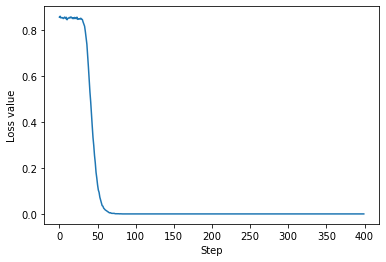

In [23]:
plt.show()
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [25]:
psi = qi.Statevector.from_instruction(qc)
rho_psi = qi.DensityMatrix(psi)
psi_hat = qi.Statevector(get_psi_hat_multiqubit(n_layer, thetas))
rho_psi_hat = qi.DensityMatrix(psi_hat)

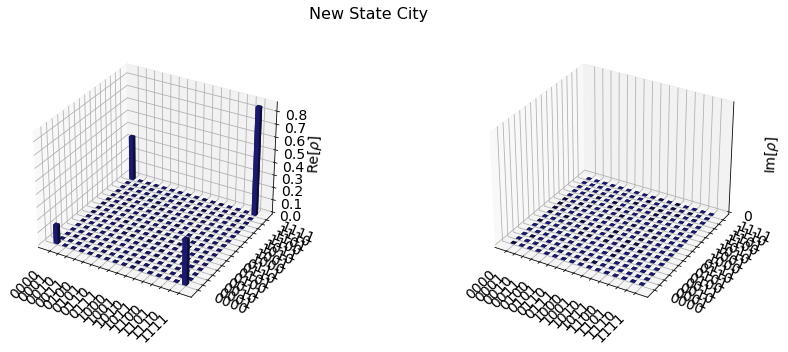

In [26]:
plot_state_city(rho_psi, color=['midnightblue', 'midnightblue'],
     title="New State City")

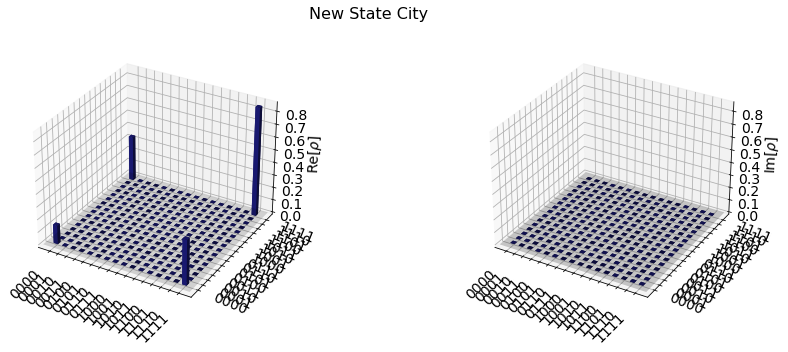

In [27]:
plot_state_city(rho_psi_hat, color=['midnightblue', 'midnightblue'],
     title="New State City")

In [28]:
psi1 = np.expand_dims(psi.data, axis=0).transpose()
psi_hat1 = np.expand_dims(psi_hat.data, axis=0).transpose()

print("Trace: ", trace_distance(rho_psi, rho_psi_hat))
print("Fidelity: ", trace_fidelity(rho_psi, rho_psi_hat))
print("Inner prodcut: ", np.linalg.norm(inner_product(psi1, psi_hat1))**2)

Trace:  0.0036112762390973783
Fidelity:  (0.9999934793207043-2.6926637571935476e-15j)
Inner prodcut:  0.9999869586839271


In [29]:
from kaleidoscope import bloch_sphere
bloch_sphere([psi, psi_hat])